In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1]:
#Import necessary libraries

import re
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVC
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

# Pre-processing

In [2]:
# Load the data
data = pd.read_csv('Tweets.csv')

# Dropping the 'textID' column
data.drop(columns=['textID'], inplace=True)

# Function to clean and preprocess text
def clean_and_preprocess_text(text):
    # Convert non-string to string
    text = str(text)
    # Lowercasing the text
    text = text.lower()
    # Removing URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Removing special characters and numbers
    text = re.sub(r'\W+|\d+', ' ', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Removing stop words and stemming
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    filtered_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    # Rejoining the tokens into a string
    cleaned_text = " ".join(filtered_tokens)
    # Check if text is empty after preprocessing
    if cleaned_text.strip() == "":
        return None
    else:
        return cleaned_text

# Applying the cleaning function to 'text' and 'selected_text' columns
data['text'] = data['text'].apply(clean_and_preprocess_text)
data['selected_text'] = data['selected_text'].apply(clean_and_preprocess_text)

# Remove rows with empty cells in 'text' column
data.dropna(subset=['text'], inplace=True)
data.dropna(subset=['selected_text'], inplace=True)

# Remove rows with "nan" in either 'text' or 'selected_text' column
data = data[(data['text'] != 'nan') & (data['selected_text'] != 'nan')]

# Display 
print(data.head(2))

# Save the preprocessed data to a new CSV file
data.to_csv('Preprocessed_Tweets.csv', index=False)

print("Preprocessed data saved to Preprocessed_Tweets.csv")

                      text selected_text sentiment
0               respond go    respond go   neutral
1  sooo sad miss san diego      sooo sad  negative
Preprocessed data saved to Preprocessed_Tweets.csv


In [3]:
# Load the CSV file into a DataFrame
file_path = 'Preprocessed_Tweets.csv'
df = pd.read_csv(file_path)

# Function to assign values based on the Sentiment column
def assign_value(sentiment):
    if sentiment == 'positive':
        return 1
    elif sentiment == 'negative':
        return -1
    else:
        return 0

# Apply the function to the 'Sentiment' column and create a new column
df['label'] = df['sentiment'].apply(assign_value)

# Save the modified DataFrame to a new CSV file
output_file_path = 'preprocessed_tweets_v2.csv'
df.to_csv(output_file_path, index=False)

print("Data has been successfully saved to", output_file_path)

Data has been successfully saved to preprocessed_tweets_v2.csv


# Machine Learning (ML) Algorithms

### 1. Maximum Entropy (ME)

In [29]:
# Read the dataset
data = pd.read_csv("Preprocessed_Tweets_v2.csv")  

# Define features and target variable
X = data['selected_text']  # Using 'selected_text' as feature
y = data['label']  # Using 'Label' as target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize Logistic Regression classifier with multinomial (MaxEnt) setting
logistic_regression = LogisticRegression(multi_class='multinomial', max_iter=1000)

# Train the Logistic Regression classifier
logistic_regression.fit(X_train_tfidf, y_train)

# Predictions on the test set
logistic_regression_test_preds = logistic_regression.predict(X_test_tfidf)

# Calculate accuracy
logistic_regression_test_accuracy = accuracy_score(y_test, logistic_regression_test_preds)
print(f"Accuracy of sentiment analysis by Maximum Entropy (ME) Algorithm: {logistic_regression_test_accuracy:.3f}")

Accuracy of sentiment analysis by Maximum Entropy (ME) Algorithm: 0.807


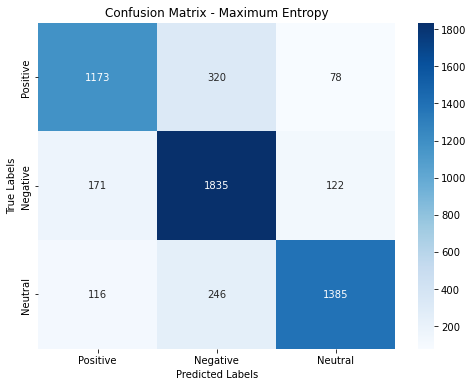

In [30]:
# Generate the confusion matrix
confusion_mat = confusion_matrix(y_test, logistic_regression_test_preds)

# Define labels for the sentiment categories
labels = ['Positive', 'Negative', 'Neutral']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Maximum Entropy")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### 2. Support Vector Machine (SVM)

In [31]:
# Read the dataset
data = pd.read_csv('preprocessed_tweets_v2.csv')

# Define features and target variable
X = data['selected_text']  # Using 'selected_text' as feature
y = data['label']  # Using 'Label' as target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the models
svm_model = SVC()

# Train the SVM model
svm_model.fit(X_train_tfidf, y_train)
svm_train_preds = svm_model.predict(X_train_tfidf)
svm_train_accuracy = accuracy_score(y_train, svm_train_preds)

# Predictions on the test set
svm_test_preds = svm_model.predict(X_test_tfidf)

# Calculate accuracy
svm_test_accuracy = accuracy_score(y_test, svm_test_preds)
print(f"Accuracy of sentiment analysis by Support Vector Machine (SVM) Algorithm: {svm_test_accuracy:.3f}")

Accuracy of sentiment analysis by Support Vector Machine (SVM) Algorithm: 0.802


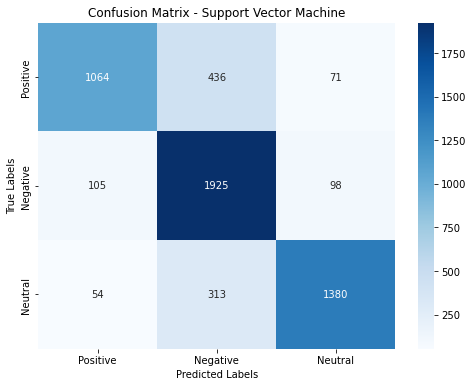

In [32]:
# Generate the confusion matrix
confusion_mat = confusion_matrix(y_test, svm_test_preds)

# Define labels for the sentiment categories
labels =['Positive', 'Negative', 'Neutral']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Support Vector Machine")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### 3. Random Forest (RF)

In [33]:
# Read the dataset
data = pd.read_csv('preprocessed_tweets_v2.csv')

# Define features and target variable
X = data['selected_text']  # Using 'selected_text' as feature
y = data['label']  # Using 'Label' as target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the models
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
random_forest_model.fit(X_train_tfidf, y_train)
random_forest_train_preds = random_forest_model.predict(X_train_tfidf)
random_forest_train_accuracy = accuracy_score(y_train, random_forest_train_preds)

# Predictions on the test set
random_forest_test_preds = random_forest_model.predict(X_test_tfidf)

# Calculate accuracy
random_forest_test_accuracy = accuracy_score(y_test, random_forest_test_preds)
print(f"Accuracy of sentiment analysis by Random Forest Algorithm: {random_forest_test_accuracy:.3f}")

Accuracy of sentiment analysis by Random Forest Algorithm: 0.800


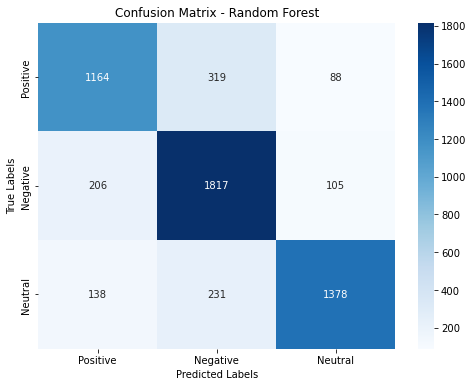

In [34]:
# Generate the confusion matrix
confusion_mat = confusion_matrix(y_test, random_forest_test_preds)

# Define labels for the sentiment categories
labels = ['Positive', 'Negative', 'Neutral']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### 4. Multinomial Naive Bayes (MNB)

In [35]:
# Read the dataset
data = pd.read_csv('preprocessed_tweets_v2.csv')

# Transform text data into a numerical format using TF-IDF
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True)
X = vectorizer.fit_transform(data['selected_text']) # Using 'selected_text' as feature
Y = data['label'] # Using 'Label' as target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Train the Multinomial Naive Bayes model
model = MultinomialNB().fit(X_train, y_train)

# Predict the classes on the test data
mnb_test_preds = model.predict(X_test)

# Calculate and print the accuracy on the test data
mnb_test_accuracy = accuracy_score(y_test, mnb_test_preds)
print(f"Accuracy of sentiment analysis by Multinomial Naive Bayes Algorithm: {mnb_test_accuracy:.3f}")

Accuracy of sentiment analysis by Multinomial Naive Bayes Algorithm: 0.783


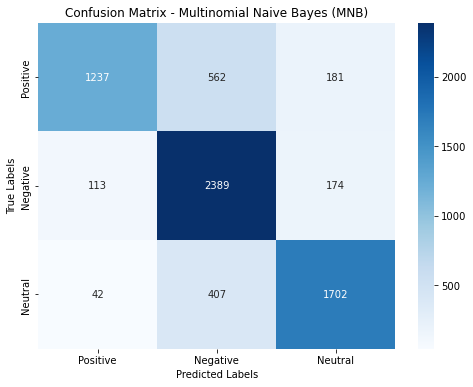

In [36]:
# Generate the confusion matrix
confusion_mat = confusion_matrix(y_test, mnb_test_preds)

# Define labels for the sentiment categories
labels = ['Positive', 'Negative', 'Neutral']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Multinomial Naive Bayes (MNB)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### 5. AdaBoost 

In [37]:
# Read the dataset
data = pd.read_csv("Preprocessed_Tweets_v2.csv")  

# Define features and target variable
X = data['selected_text']  # Using 'selected_text' as feature
y = data['label']  # Using 'Label' as target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize Decision Tree as base classifier for AdaBoost
base_classifier = DecisionTreeClassifier(max_depth=24)

# Initialize AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train_tfidf, y_train)

# Predictions on the test set
adaboost_test_preds = adaboost_classifier.predict(X_test_tfidf)

# Calculate accuracy
adaboost_test_accuracy = accuracy_score(y_test, adaboost_test_preds)
print(f"Accuracy of sentiment analysis by AdaBoost Algorithm: {adaboost_test_accuracy:.3f}")

Accuracy of sentiment analysis by AdaBoost Algorithm: 0.765


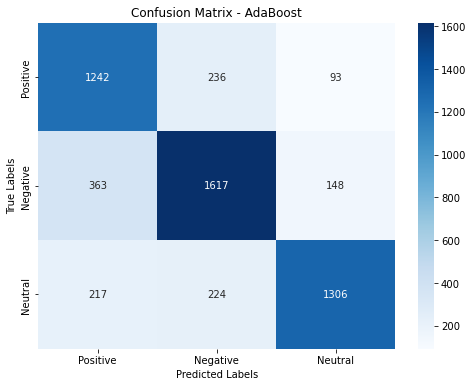

In [38]:
# Generate the confusion matrix
confusion_mat = confusion_matrix(y_test, adaboost_test_preds)

# Define labels for the sentiment categories
labels = ['Positive', 'Negative', 'Neutral']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - AdaBoost")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### 6. K-Nearest Neighbors (K-NN)

In [39]:
# Read the dataset
data = pd.read_csv("Preprocessed_Tweets_v2.csv")  

# Define features and target variable
X = data['selected_text']  # Using 'text' as feature
y = data['label']  # Using 'Label' as target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize KNN classifier
k = 25
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the KNN classifier
knn_classifier.fit(X_train_tfidf, y_train)

# Predictions on the test set
knn_test_preds = knn_classifier.predict(X_test_tfidf)

# Calculate accuracy
knn_test_accuracy = accuracy_score(y_test, knn_test_preds)
print(f"Accuracy of sentiment analysis by K-Nearest Neighbors Algorithm (K-NN) Algorithm: {knn_test_accuracy:.3f}")

Accuracy of sentiment analysis by K-Nearest Neighbors Algorithm (K-NN) Algorithm: 0.676


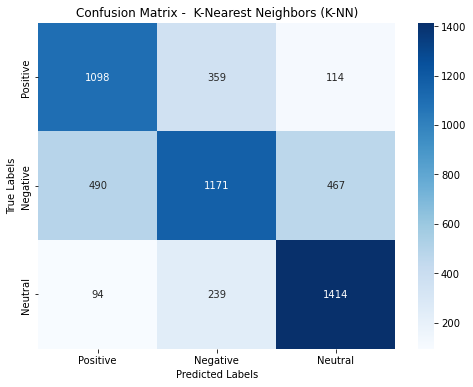

In [40]:
# Generate the confusion matrix
confusion_mat = confusion_matrix(y_test, knn_test_preds)

# Define labels for the sentiment categories
labels = ['Positive', 'Negative', 'Neutral']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix -  K-Nearest Neighbors (K-NN)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### 7. Vader

In [41]:
# Ensure the VADER lexicon is downloaded
nltk.download('vader_lexicon', quiet=True)

# Read the dataset
data = pd.read_csv('preprocessed_tweets_v2.csv')

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Function to convert sentiment score to class
def get_sentiment_class(score):
    if score > 0:
        return 1
    elif score < 0:
        return -1
    else:
        return 0

# Process each tweet in the DataFrame and count correct predictions
predictions = []
classes = []
for index, row in data.iterrows():
    sentiment_score = sia.polarity_scores(row['selected_text'])['compound']
    sentiment_class = get_sentiment_class(sentiment_score)
    predictions.append(sentiment_class)
    classes.append(row['label'])

# Calculate and print the accuracy
vader_test_accuracy = np.mean(np.array(predictions) == np.array(classes))
print(f"Accuracy of sentiment analysis by VADER Algorithm: {vader_test_accuracy:.3f}")

Accuracy of sentiment analysis by VADER Algorithm: 0.557


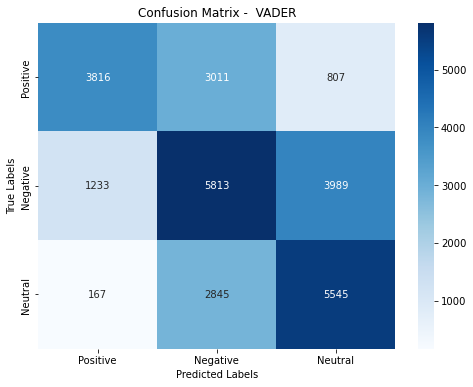

In [42]:
confusion_mat = confusion_matrix(classes, predictions)

# Define labels for the sentiment categories
labels = ['Positive', 'Negative', 'Neutral']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix -  VADER")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Data Visualization

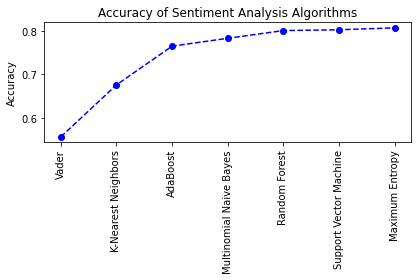

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy values
accuracy_me = logistic_regression_test_accuracy
accuracy_svm = svm_test_accuracy
accuracy_rf = random_forest_test_accuracy
accuracy_mnb = mnb_test_accuracy
accuracy_adaboost = adaboost_test_accuracy
accuracy_knn = knn_test_accuracy
accuracy_vader = vader_test_accuracy

# Plotting
algorithms = ['Maximum Entropy', 'Support Vector Machine', 'Random Forest', 'Multinomial Naive Bayes', 'AdaBoost', 'K-Nearest Neighbors', 'Vader']
accuracies = [accuracy_me, accuracy_svm, accuracy_rf, accuracy_mnb, accuracy_adaboost, accuracy_knn, accuracy_vader]

# Sort algorithms and accuracies based on accuracies
sorted_indices = np.argsort(accuracies)
algorithms = [algorithms[i] for i in sorted_indices]
accuracies = [accuracies[i] for i in sorted_indices]

# Increase space between x-axis labels
x = np.arange(len(algorithms))
fig, ax = plt.subplots()
plt.xticks(x, algorithms, rotation='vertical')

# Plot dots
plt.plot(x, accuracies, marker='o', linestyle='--', color='b')

plt.ylabel('Accuracy')
plt.title('Accuracy of Sentiment Analysis Algorithms')

plt.tight_layout()
plt.show()

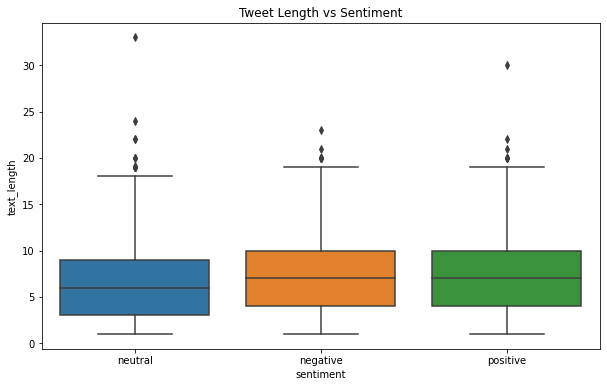

In [18]:
# Analyzing the Relationship Between Tweet Length and Sentiment

# Calculate the length of each tweet and store it in a new column 'text_length'
data['text_length'] = data['text'].apply(lambda x: len(x.split()))

# Create a boxplot to visualize the relationship between tweet length and sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='text_length', data=data)
plt.title('Tweet Length vs Sentiment')
plt.show()

##### Tweet Length vs Sentiment:

From the boxplot, we see that the median tweet length for neutral sentiments is slightly lower than that for positive and negative sentiments.

The spread for negative tweets appears to be larger than for the other two categories.

Outliers are present in all three sentiment categories, indicating that there are some tweets significantly longer than the average.

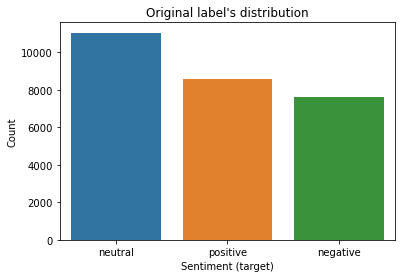

In [19]:
# Sentiment Distribution
plt.figure()
sns.countplot(x='sentiment', data=data, order=data['sentiment'].value_counts().iloc[:].index)
plt.xlabel('Sentiment (target)')
plt.ylabel('Count')
plt.title('Original label\'s distribution')
plt.show()

##### Sentiment Distribution:
The bar chart displays that neutral sentiments are the most prevalent in the dataset, followed by positive and then negative sentiments.

This could indicate that people tend to tweet in a neutral tone more frequently. The relatively balanced distribution between 
positive and negative sentiments shows somehow balanced.

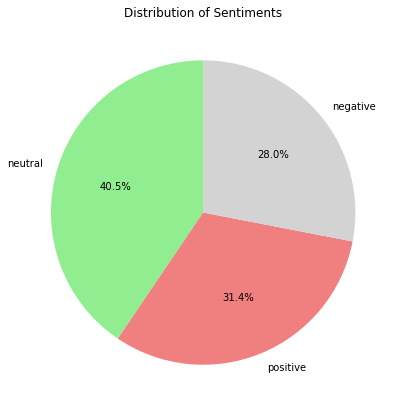

In [20]:
# Sentiment Distribution
fig = plt.figure(figsize=(7,7))
colors = ("lightgreen", "lightcoral", "lightgray")
tags = data['sentiment'].value_counts()

# Plotting the pie chart
tags.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Sentiments')
plt.ylabel('')
plt.show()

##### Sentiment Distribution:
The bar chart displays that neutral sentiments are the most prevalent in the dataset, followed by positive and then negative sentiments. 

This could indicate that people tend to tweet in a neutral tone more frequently. The relatively balanced distribution between positive and negative sentiments shows somehow balanced.

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='text', ylabel='Density'>

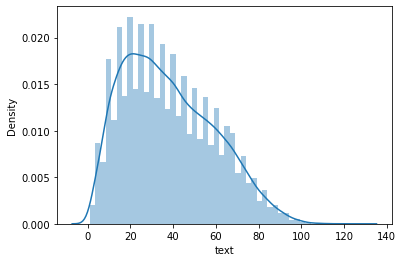

In [21]:
sns.distplot(data.text.str.len())

##### This figure shows that the most demonstrative posts on the X platform are between 20 and 40 characters in length.

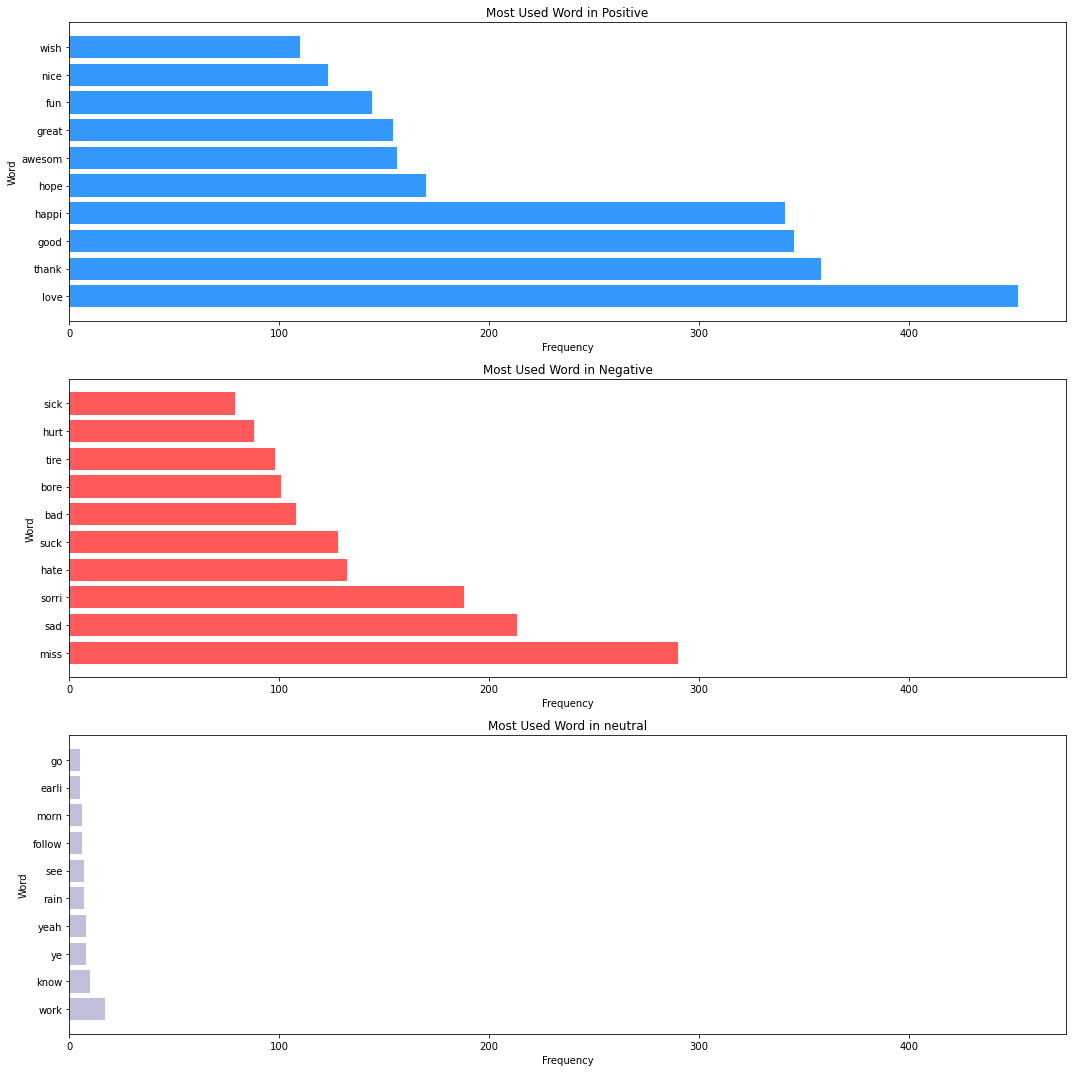

In [22]:
#slice for only positive tweets
positif = data[data['sentiment']=='positive']['selected_text']
#determine 10 most used words
most_pos = positif.value_counts()[:10]

#slice for only negative tweets
negatif = data[data['sentiment']=='negative']['selected_text']
#determine 10 most used words
most_neg = negatif.value_counts()[:10]

#slice for only neutral tweets
netral = data[data['sentiment']=='neutral']['selected_text']
#determine 10 most used words
most_neu = netral.value_counts()[:10]

fig = plt.figure(figsize=(15,15))

neu = fig.add_subplot(313)
neu.set_xlabel('Frequency')
neu.set_ylabel('Word')
neu.set_title("Most Used Word in neutral")
plt.barh(most_neu.index, most_neu.values, color='#BFBFD9')

pos = fig.add_subplot(311)
pos.set_xlabel('Frequency')
pos.set_ylabel('Word')
pos.set_title("Most Used Word in Positive")
plt.barh(most_pos.index, most_pos.values, color='#3399FF')

neg = fig.add_subplot(312)
neg.set_xlabel('Frequency')
neg.set_ylabel('Word')
neg.set_title("Most Used Word in Negative")
plt.barh(most_neg.index, most_neg.values, color='#FF5959')

pos.get_shared_x_axes().join(pos, neg, neu)
plt.tight_layout()
plt.savefig("Most Words per sentiment")

As shown in the figure, the five most frequent words on the X platform are "love" which is a positive word, followed by "thank" which is also positive, then "good" another positive word, "happy" a positive word, and the fifth word is "miss," which is a negative word.